In [1]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  
from sklearn.datasets import make_regression 
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error
from sklearn.linear_model import Lasso

torch.manual_seed(0) 
X = torch.randn(100, 1) 
true_weights = torch.tensor([[5.0]])
true_bias = 2.0
y = X @ true_weights + true_bias +0.5 *torch.randn(100, 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [2]:
model = nn.Linear(in_features=1, out_features=1)

optimizer = optim.SGD(model.parameters(), lr=0.1)
epochs = 1000
l1_lambda =0.1
l = nn.MSELoss()
losses = []
epochs = 1000

for epoch in range(epochs): 
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = l(y_pred, y_train) 

    l1_penalty = sum(torch.sum(torch.abs(param)) for param in model.parameters())

    losses.append(loss)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0: 
        print("Epoch Number: ", epoch, "MSE: ", loss.item())
    
model.eval()
with torch.no_grad(): 
    y_pred = model(X_test) 
    loss = l(y_pred, y_test) 
    r2 = r2_score(y_test, y_pred.numpy())

print("Test R2 Score: ", r2) 
print("Test MSE: ", loss) 
print("Weights: ", model.weight.data.numpy(), "Bias: ", model.bias.data.numpy())

Epoch Number:  99 MSE:  0.21014487743377686
Epoch Number:  199 MSE:  0.21014487743377686
Epoch Number:  299 MSE:  0.21014487743377686
Epoch Number:  399 MSE:  0.21014487743377686
Epoch Number:  499 MSE:  0.21014487743377686
Epoch Number:  599 MSE:  0.21014487743377686
Epoch Number:  699 MSE:  0.21014487743377686
Epoch Number:  799 MSE:  0.21014487743377686
Epoch Number:  899 MSE:  0.21014487743377686
Epoch Number:  999 MSE:  0.21014487743377686
Test R2 Score:  0.9868674489808065
Test MSE:  tensor(0.2073)
Weights:  [[4.9372897]] Bias:  [2.0575354]


In [3]:
# Using the same records as the previous model 
lasso = Lasso(0.1)
X_train = X_train.numpy()
X_test = X_test.numpy()
y_train = y_train.numpy()
y_test = y_test.numpy()

lasso.fit(X_train, y_train) 
y_pred = lasso.predict(X_test) 
mse = mean_squared_error(y_pred, y_test) 
r2_score = r2_score(y_test, y_pred) 

print("Test MSE:", mse) 
print("R2score:", r2_score) 
print("Coefficients: ", lasso.coef_)
print("Intercept: ", lasso.intercept_)

Test MSE: 0.21560815
R2score: 0.9863398192916975
Coefficients:  [4.8503175]
Intercept:  [2.058702]


Text(0, 0.5, 'predicted y')

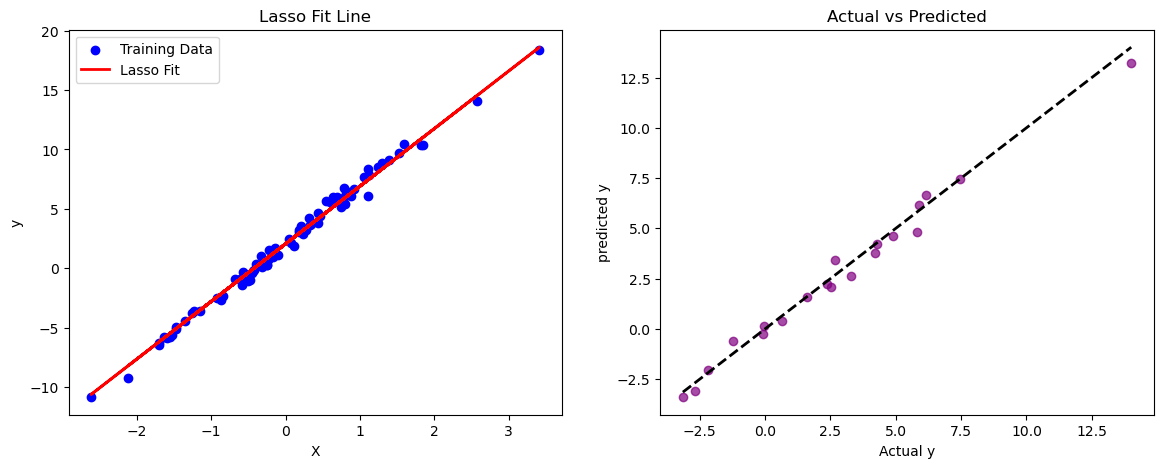

In [22]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1) 
plt.scatter(X_train, y_train, color='blue', label='Training Data') 
plt.plot(X_train, lasso.predict(X_train), color='red',linewidth=2, label = 'Lasso Fit')
plt.title('Lasso Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2) 
plt.scatter(y_test, y_pred, color='purple', alpha=0.7) 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title("Actual vs Predicted") 
plt.xlabel('Actual y') 
plt.ylabel('predicted y')